In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import PlotStyler, ContinuousDynamicalSystem as cds

In [2]:
ds = cds(model="rossler system")

In [14]:
u0 = [0, 0.1, 0]
total_time = 2000
transient_time = 1000
num_intersections = 5000
c_range = (1, 10)
c = np.linspace(*c_range, 1000)
sampling_time = 1

In [15]:
parameters = [0.2, 0.2, 10]
trajectory = ds.trajectory(u0, total_time, parameters=parameters, transient_time=transient_time)
sm = ds.stroboscopic_map(u0, num_intersections, sampling_time, parameters=parameters, transient_time=transient_time)
mm = ds.maxima_map(u0, num_intersections, 2, parameters=parameters, transient_time=transient_time)

In [16]:
ds.hurst_exponent(u0, num_intersections, parameters=parameters, transient_time=transient_time, sampling_time=sampling_time)

array([0.15888622, 0.33768248, 0.42724522])

<Figure size 640x480 with 0 Axes>

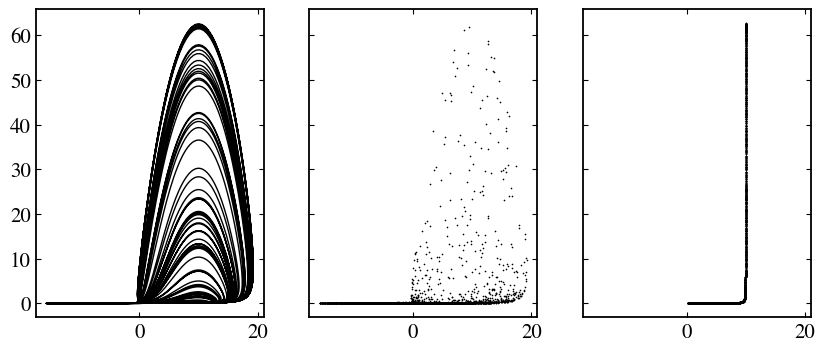

In [17]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 4))

ax[0].plot(trajectory[:, 1], trajectory[:, 3], "k")
ax[1].plot(sm[:, 1], sm[:, 3], "ko", ms=1.2, markeredgewidth=0)
ax[2].plot(mm[:, 1], mm[:, 3], "ko", ms=1.2, markeredgewidth=0)

In [18]:
ds.lyapunov(u0, total_time, parameters=parameters, transient_time=transient_time)

array([ 1.06567046e-01,  6.80248669e-04, -9.73884224e+00])

In [19]:
MLE = np.zeros_like(c)
for i in range(c.shape[0]):
    parameters = [0.2, 0.2, c[i]]
    MLE[i] = ds.lyapunov(u0, total_time, parameters=parameters, transient_time=transient_time, num_exponents=1)[0]

In [20]:
H = np.zeros((len(c), 3))
for i in range(c.shape[0]):
    parameters = [0.2, 0.2, c[i]]
    H[i] = ds.hurst_exponent(u0, num_intersections, parameters=parameters, transient_time=transient_time, sampling_time=sampling_time)

In [21]:
H.mean(axis=1).shape

(1000,)

<Figure size 640x480 with 0 Axes>

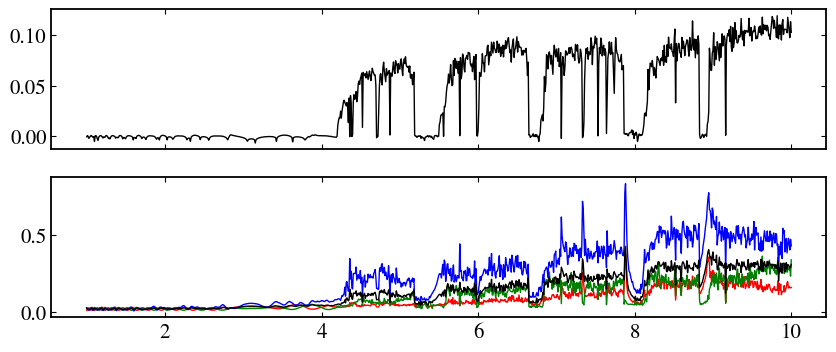

In [22]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 4))

ax[0].plot(c, MLE, "k-")
ax[1].plot(c, H[:, 0], "r-")
ax[1].plot(c, H[:, 1], "g-")
ax[1].plot(c, H[:, 2], "b-")
ax[1].plot(c, H.mean(axis=1), "k-")